In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# Our code
import traces_analysis
import load_traces
import parser_to_batsim
import parser_from_batsim_results
import analysis_RLSched

In [3]:
from importlib import reload
reload(traces_analysis)
reload(load_traces)
reload(parser_to_batsim)
reload(parser_from_batsim_results)
reload(analysis_RLSched)

<module 'analysis_RLSched' from '/home/robin/Documents/git divers/hpc_metrics_code/analysis_RLSched.py'>

In [14]:
labelsize = 29
plt.rc('xtick', labelsize=labelsize)
plt.rc('ytick', labelsize=labelsize) 
plt.rc('axes', labelsize=labelsize) 
plt.rc('figure', titlesize=labelsize)

# Results when shortest jobs are cut

In [4]:
# load results
sd_list_, df_sd_, sd_starts_ = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/bdsd_cut/')
sd_list, df_sd, sd_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/bdsd/')
sd_list, df_sd, sd_starts = [sd_list[3]] + sd_list_, [df_sd[3]] + df_sd_, [sd_starts[3]] + sd_starts_
ll_sd = parser_from_batsim_results.make_loss_list(df_sd, total_number_of_nodes=256, dropout=[0.15,0.85])
fcfs_list_, df_fcfs_, fcfs_starts_ = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/FCFS_cut/')
fcfs_list, df_fcfs, fcfs_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/FCFS/')
fcfs_list, df_fcfs, fcfs_starts = [fcfs_list[3]] + fcfs_list_, [df_fcfs[3]] + df_fcfs_, [fcfs_starts[3]] + fcfs_starts_
ll_fcfs = parser_from_batsim_results.make_loss_list(df_fcfs, total_number_of_nodes=256, dropout=[0.15,0.85])

In [5]:
# display results
a,b = ll_sd['raw bounded slowdown']
c,d = ll_fcfs['raw bounded slowdown']
print('Mbsd Lublin-1 with RLScheduler (trained on Mbsd):', a )
print('Mbsd Lublin-1 with FCFS:', c )
print('Mbsd Lublin-1 (with cut) with RLScheduler (trained on Mbsd):', b )
print('Mbsd Lublin-1 (with cut) with FCFS:', d )

Mbsd Lublin-1 with RLScheduler (trained on Mbsd): 54.2927106548329
Mbsd Lublin-1 with FCFS: 460.65446269051273
Mbsd Lublin-1 (with cut) with RLScheduler (trained on Mbsd): 11.304276916523905
Mbsd Lublin-1 (with cut) with FCFS: 34.100228847780954


# Lublin256 (gantt charts)

In [7]:
u_list, df_u, u_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/utilization/')
ll_u = parser_from_batsim_results.make_loss_list(df_u, total_number_of_nodes=256, dropout=[0.15,0.85])
sd_list, df_sd, sd_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/bdsd/')
ll_sd = parser_from_batsim_results.make_loss_list(df_sd, total_number_of_nodes=256, dropout=[0.15,0.85])
fcfs_list, df_fcfs, fcfs_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/FCFS/')
ll_fcfs = parser_from_batsim_results.make_loss_list(df_fcfs, total_number_of_nodes=256, dropout=[0.15,0.85])

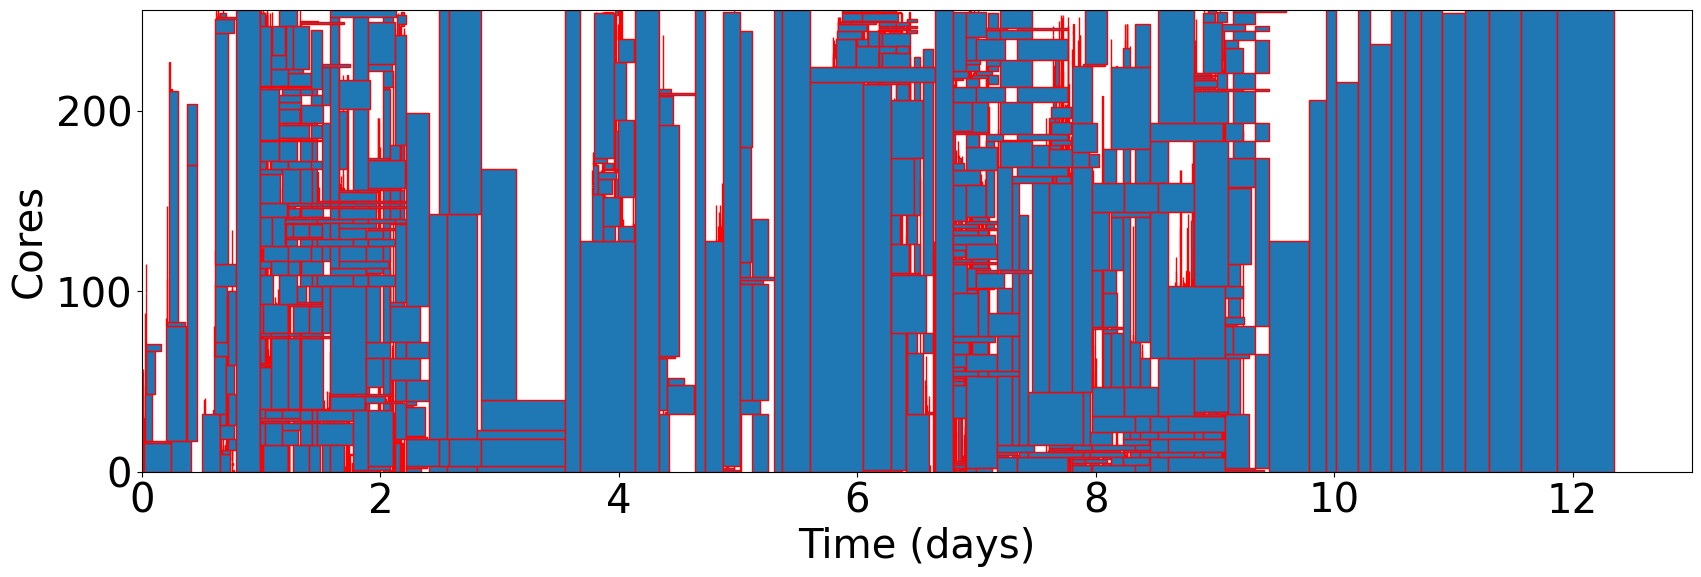

In [20]:
# RLSched-MBSD, start at index 5000, 1024 jobs
cu = analysis_RLSched.interpol_gantt_chart(df_sd[0], 256, figsize=(20,6), x_max=13)

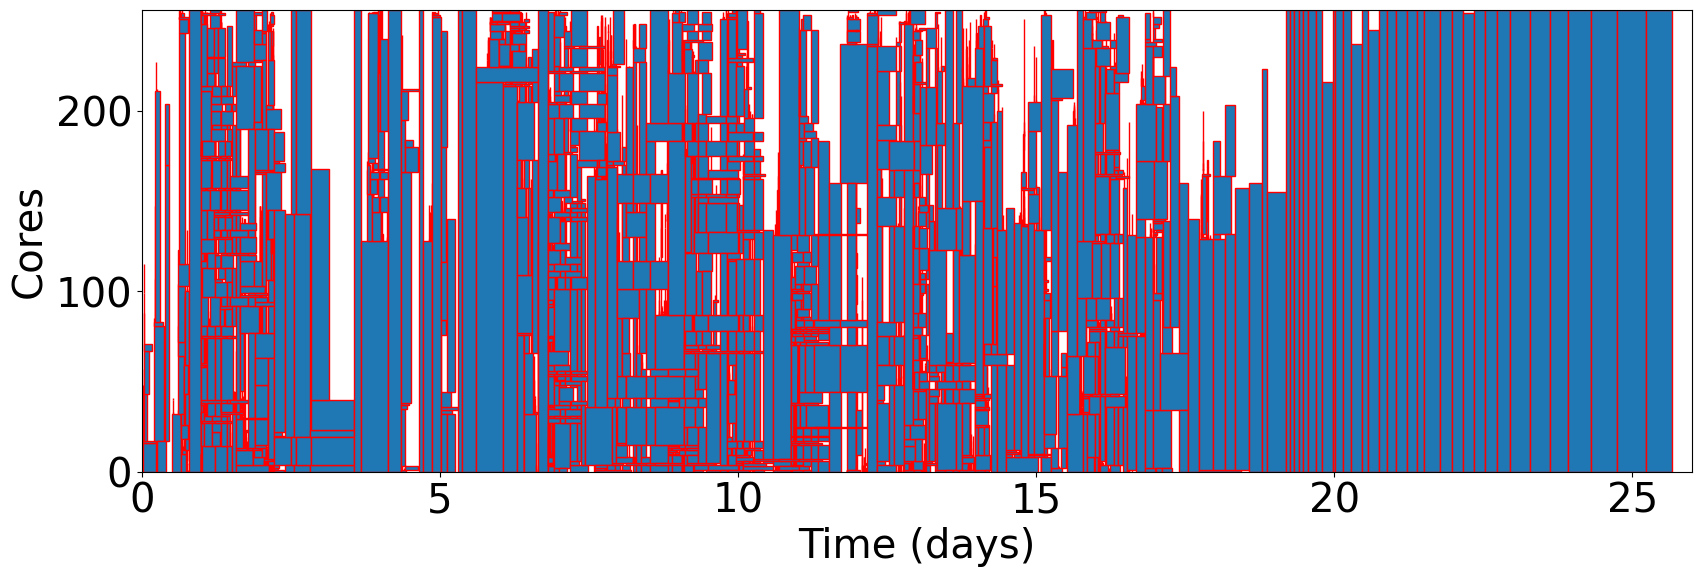

In [19]:
# RLSched-MBSD, start at index 5000, 2048 jobs
cu = analysis_RLSched.interpol_gantt_chart(df_sd[1], 256, figsize=(20,6), x_max=26)

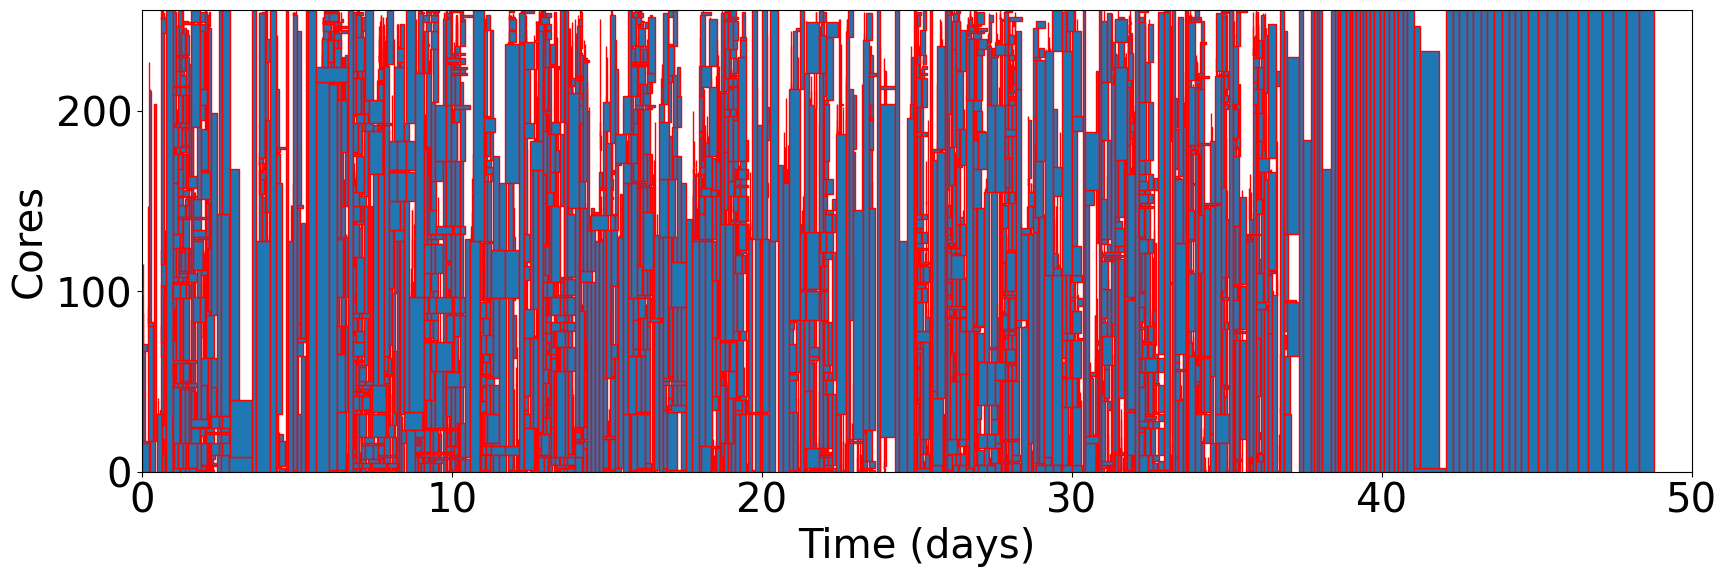

In [18]:
# RLSched-MBSD, start at index 5000, 4096 jobs
cu = analysis_RLSched.interpol_gantt_chart(df_sd[2], 256, figsize=(20,6), x_max=50)

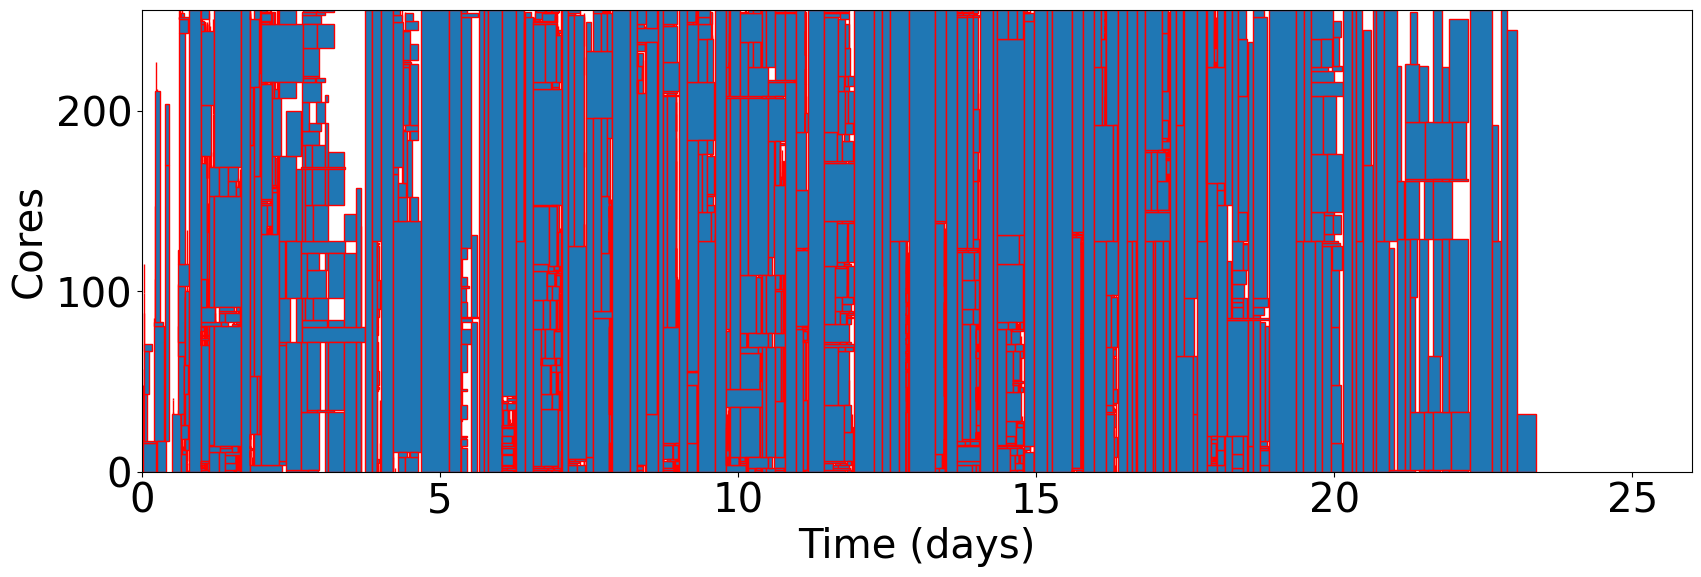

In [17]:
# FCFS, start at index 5000, 2048 jobs
cu = analysis_RLSched.interpol_gantt_chart(df_fcfs[1], 256, figsize=(20,6), x_max=26)

In [90]:
# FCFS, start at index 5000, 2048 jobs
cu = analysis_RLSched.interpol_gantt_chart(df_u[1], 256, figsize=(20,6), x_max=26)

# Lublin256 (figures)

In [12]:
u_list, df_u, u_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/utilization/')
ll_u = parser_from_batsim_results.make_loss_list(df_u, total_number_of_nodes=256, dropout=[0.15,0.85])
sd_list, df_sd, sd_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/bdsd/')
ll_sd = parser_from_batsim_results.make_loss_list(df_sd, total_number_of_nodes=256, dropout=[0.15,0.85])
fcfs_list, df_fcfs, fcfs_starts = analysis_RLSched.load_simulation_list_bis('RLsched_traces/Lublin256_mono/FCFS/')
ll_fcfs = parser_from_batsim_results.make_loss_list(df_fcfs, total_number_of_nodes=256, dropout=[0.15,0.85])

In [8]:
# tau = 10 sec
# tau can be changed in the function max_bounded_slowndown in parser_from_batsim_results.py
plt.figure(figsize=(16,6))
Keyword = 'max bounded slowdown'
series = [ll_u, ll_sd, ll_fcfs]
labels = ['RLScheduler\n(Utilization)', 'RLScheduler\n(Slowdown)', 'FCFS+BF', 'EASY-bf\n(Batsim)']
for i in range(len(series)):
    plt.plot([10,11,12,np.log2(10000)],series[i][Keyword], label = labels[i])
plt.grid(visible=True, which = 'major', axis='both', c='k')
plt.grid(visible=True, which = 'minor', axis='y')
plt.minorticks_on()
# plt.xscale('log')
plt.xticks([10+i for i in [0,1,2,np.log2(10000)-10]], [1024,2048,4096,10000])
plt.xlabel('Sample length')
plt.ylabel('Max bounded slowdown')
plt.legend(fontsize = 20)
plt.show()

In [122]:
# tau = 3600 sec
# tau can be changed in the function max_bounded_slowndown in parser_from_batsim_results.py
plt.figure(figsize=(16,6))
Keyword = 'max bounded slowdown'
series = [ll_u, ll_sd, ll_fcfs]
labels = ['RLScheduler\n(Utilization)', 'RLScheduler\n(Slowdown)', 'FCFS+BF', 'EASY-bf\n(Batsim)']
for i in range(len(series)):
    plt.plot([10,11,12,np.log2(10000)],series[i][Keyword], label = labels[i])
plt.grid(visible=True, which = 'major', axis='both', c='k')
plt.grid(visible=True, which = 'minor', axis='y')
plt.minorticks_on()
# plt.xscale('log')
plt.xticks([10+i for i in [0,1,2,np.log2(10000)-10]], [1024,2048,4096,10000])
plt.xlabel('Sample length')
plt.ylabel('Max bounded slowdown')
plt.legend(fontsize = 20)
plt.show()

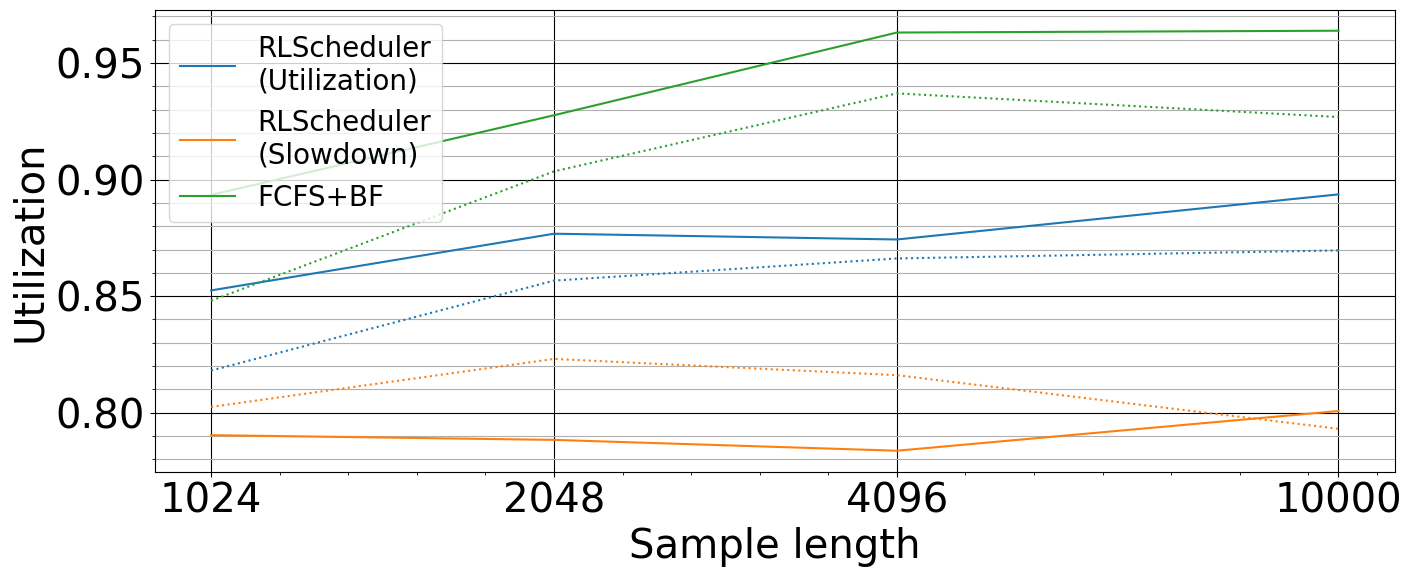

In [15]:
# green dotted lines give the utilization when using no measurement bounds
plt.figure(figsize=(16,6))
Keyword = 'raw utilization'
Keyword2 = 'boundless utilization'
series = [ll_u, ll_sd, ll_fcfs]
labels = ['RLScheduler\n(Utilization)', 'RLScheduler\n(Slowdown)', 'FCFS+BF', 'EASY-bf\n(Batsim)']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728']
for i in range(len(series)):
    plt.plot([10,11,12,np.log2(10000)],series[i][Keyword], label = labels[i], c = colors[i])
    plt.plot([10,11,12,np.log2(10000)],series[i][Keyword2], linestyle='dotted', c = colors[i])
plt.grid(visible=True, which = 'major', axis='both', c='k')
plt.grid(visible=True, which = 'minor', axis='y')
plt.minorticks_on()
# plt.xscale('log')
plt.xticks([10+i for i in [0,1,2,np.log2(10000)-10]], [1024,2048,4096,10000])
plt.xlabel('Sample length')
plt.ylabel('Utilization')
plt.legend(fontsize = 20)
plt.show()

In [16]:
ll = [[df_u[3]], [df_sd[3]], [df_fcfs[3]]]
input = [ pd.concat(e) for e in ll]
plt.figure(figsize = (18,8))
plt.grid(which='minor', axis='x')
# plt.ylim(bottom = 1e-10, top = 2e2)
a = analysis_RLSched.boxplot_behaviour_per_group_bis(input, 'area', 'linear', 9, 'wait time', labels = ['Utilization Network', 'Bsld Network', 'FCFS+BF'], yscale = 'log', fontsize = labelsize, x_scalse_mutltiplier = 3600, y_scalse_mutltiplier=  3600,)
plt.show()